## importing libraries

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

## Inserting dataset from keras

In [3]:
from keras.datasets import cifar10
ci=cifar10.load_data()
dir(ci)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn=KNeighborsClassifier(n_neighbors=7)

In [8]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [12]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [13]:
knn.fit(x_train2,y_train)

C:\Users\kunal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [14]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [15]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [17]:
cm=confusion_matrix(y_pred_knn,y_test)
cm

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]], dtype=int64)

Text(69.0, 0.5, 'Truth')

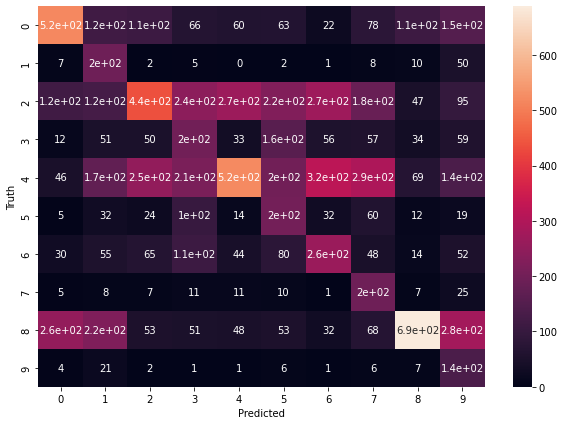

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')